# 載入套件

In [1]:
import docx2txt
import pandas as pd
import jieba
from ckiptagger import data_utils, construct_dictionary, WS, POS, NER
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import jieba.analyse
from gensim.models.word2vec import Word2Vec

pd.set_option('display.height', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 50)
pd.set_option('display.max_colwidth', -1)

height has been deprecated.



# 讀取QA問答集

In [2]:
loan = pd.read_csv('loan.csv')
credit_card = pd.read_csv('credit_card.csv')
print(len(loan), len(credit_card))

46 71


In [3]:
loan.head()

,question,answer
0,如何辦理保單借款（本人、代辦）？金額如何計算？,1.要保人親自辦理保單借款時須檢具文件：(1)個人保件：「保單借款合約書」(每份保單一張)；要保人與被保險人須親自簽名。要保人身份證正本或護照正本。(自105/09/05起，取消駕照可為正式文件一事。)(2)要保人為公司之保件：「保單借款合約書」(每份保單一張)；蓋公司章並須有被保險人親自簽名同意公司負責人身份證(公司負責人身份證未載明為該公司負責人時，應補公司營業執照正本)公司章：與原要保書所蓋之印鑑相同；若留存於本公司之印鑑已變更者，以變更後之印鑑為準填寫「遵循洗錢防制法之客戶身分辨識表(法人適用)」(107.05.25新增)2.要保人委託他人代辦保單借款時須檢具文件：受任人須在「保單借款合約書」之「見證人／受任人簽章」欄位簽章並攜帶身份證正本或護照正本，連同要保人保單、身份證正本、保單借款合約書代辦保單借款。(自105/09/05起，取消駕照可為正式文件一事。)(若為業務同仁代由通訊處送件，請檢付要保人身份證影本，並請要保人於影本上簽名。)3.目前最高可借款額度為保單價值準備金或現金價值兩者較低之九成（千元以下捨去）。
1,要保人為法人之保單，辦理保單借款時，有何需注意事項？,AG通路自受理日107年5月25日(含)起，BK通路自受理日107年6月1日(含)起，需請法人要保人填寫「遵循洗錢防制法之客戶身分辨識表(法人適用)」(下稱法人辨識表)，並依下列方式處理：1.接獲客戶簽回之「法人辨識表」，應確認「法人辨識表」所填實際受益人資料正確性。(1)利用網徵查得資料，若與客戶提供之「法人辨識表」有落差時，請客戶進一步提供組織章程或類似之權利文件。(2)依取得之文件及客戶回覆之法人負責人及其實質受益人，至CASA系統查詢確認，若為警示名單(A1~A5)，應依循保戶服務防制洗錢及打擊資助恐怖主義相關作業為適當之審查及處理，並請依作業規範由較高層級主管核准。2.倘客戶未簽回「法人辨識表」者，請至相關主管單位入口網站、或Google、Yahoo、百度…等搜詢引擎進行網徵(網徵作業畫面須留存備查)，並依查得之法人負責人及其實質受益人，至CASA系統查詢確認，若為警示名單(A1~A5)，應依循保戶服務防制洗錢及打擊資助恐怖主義相關作業為適當之審查及處理，並請依作業規範由較高層級主管核准。3.「法人辨識表」已置於：南山人園地(AES)/下載專區/申請表格/各項申請表格下載專區/核保部。
2,何時可領借款之現金或支票？何處可辦理？所需時間（本人、代辦、郵寄）？,要保人本人或代辦人可於全省各分公司或總公司辦理保單借款，要保人本人辦理時，承辦人員受理審核過後約三十分鐘可現場領取即期支票而非現金；或者以限時掛號的方式連同保單與即期支票一並寄給要保人。要保人委託他人代辦保單借款時，一律採匯款方式匯至要保人帳戶。
3,借款利息如何計算？如何償還？,1.利息計算(1)依各險種之保單預定利率為基準加碼調整且設定上、下限，若保單預定利率加碼後超過上限或低於下限時，則各以上、下限利率為該保單之保單借款/自動墊繳保費利率。加碼率及保單借款/自動墊繳保費利率之上、下限則將依市場狀況機動調整。(2)保單條款另有約定單借款/自動墊繳保費利率為10﹪者，仍維持不變。2.利率規則如下：(1)依各險種之保單預定利率加碼，加碼率：O.五%。(2)保單借款/自動墊繳保費利率上限：年息六.九﹪。(3)保單借款/自動墊繳保費利率下限：年息四﹪。自105.9.01起，調整幣利率變動型商品之保單貸款利率為依各商品的『保單宣告利率+1%』，無利率上下限之限制。3.償還的方式(1)保單借款本金部份：隨時皆可償還(2)保單借款利息部份：保單週年日償還，若經催告未償還將會滾入本金計算。(3)償還的管道（現金或即期票）南山繳費服務通路契變/復效還款不定期增額郵局劃撥(帳號49765條碼劃撥單)--102.5.27生效VVV7-11便利商店多媒體機(ibon)VV全家便利商店多媒體機(FamiPort)VV7-11之中信銀行ATM(查詢及繳費客製化功能)VVV台新銀行ATM(查詢及繳費客製化功能)VVV金融機構ATM轉帳(永豐銀行807/中國信託822)VVV金融機構臨櫃匯款V信用卡/客戶服務櫃檯臨櫃刷卡(復效保費不含貸款及墊繳者)V客戶服務櫃檯臨櫃繳交現金VVV以支票繳費VVV
4,借款利息起算日為何日？還款當天是否仍計息?,借款當天若為支票領取，當天同時還款，是否計息?臨櫃辦理保單貸款，「支票」或「匯款」利計算日若不相同者，系統是否可判斷其差異?現行辦理保單借款作業係以「實際付款/匯款日為保單借款生效日」，依借款合約書約定「給付借款金額日」開始計息(算頭不算尾)。快速服務保單借款：當日受理之案件於次一個工作日匯款(即保單借款生效日)，生效日開始計息。臨櫃辦理：(1)支票領取「實際付款/匯款日為保單借款生效日」開始計息。(2)匯款至帳戶「實際付款/匯款日為保單借款生效日」開始計息。郵寄辦理：「實際付款/匯款日為保單借款生效日」開始計息。借款當天是否仍計息?是還款當日是否仍計息?否


In [4]:
credit_card.head()

,question,answer
0,目前可以受理繳首續期保險費的信用卡卡別有哪些?,VISA、MASTER、JCB、AE卡(102.11.25新增)，大來卡目前並不受理。郵局金融卡原無法受理，自101年11月起郵局開放非過卡交易功能，若保戶已向郵局申請開通此功能才可申請首/續期扣款及臨櫃刷卡。
1,授權書上資料填寫有誤可否塗改？,信用卡扣款件：若有塗改，要保人及授權人應於更改處簽名。銀行轉帳件：須要保人簽名外，務必於塗改處加蓋授權人之原留印鑑始可受理。
2,倘授權人提出終止授權申請時該如何處理？,授權人表示與要保人因私人因素不方便連絡(例：已離婚..)時，請先嘗試透過保單所屬AG連絡要保人處理變更授權事宜。若要保人出國或失聯..等情形，無法透過要保人辦理取消授權時，請照會總公司收費管理部協助提供相關申請文件予授權人申請取消作業。若非上述情形，亦請協助照會總公司收費管理部協助確認是否可個案處理，以避免後續抱怨。
3,信用卡繳費是否享有保費折扣？,信用卡繳費無折扣，但若以南山人壽認同卡/聯名卡扣款，且扣款成功，最高可享有保費1%折扣。
4,保戶已繳費，為何又扣款？,若保戶於產生扣款資料後才又由其他繳費管道入帳，即可能發生重複繳費之情況。


# Jieba斷詞 vs. 中研院斷詞系統

中研院斷詞系統介紹：https://ckip.iis.sinica.edu.tw/project/ws

Jieba github：https://github.com/fxsjy/jieba

In [5]:
def jieba_token(text):
    words = jieba.cut(text, HMM=True)
    return ' '.join([word for word in words])

def tf_idf(text):
    words = jieba.analyse.extract_tags(text, topK=5) 
    return ' '.join([word for word in words])

test_hmm = list(credit_card.question.apply(jieba_token))
         
test_tf = list(credit_card.question.apply(tf_idf))

hmm = pd.DataFrame(test_hmm, columns=['jieba'])
tf_idf = pd.DataFrame(test_tf, columns=['jieba_tf_idf'])

Building prefix dict from the default dictionary ...
Dumping model to file cache /var/folders/3y/pff5kgh92955n03ykb80pf6c0000gn/T/jieba.cache
Loading model cost 1.221 seconds.
Prefix dict has been built successfully.


In [6]:
path = r'/Users/glenn/中研院詞庫'
ws = WS(path)
pos = POS(path)
ner = NER(path)
#新增詞典
word_to_weight = {    
    "首續期": 100,
    "同一期": 1, 
    "南山人壽": 1,
    "照會單": 100,
    "送金單": 1,
    "寬限期": 1,
    "行動智慧網": 100,
    "辦卡":1,
    "要保人":100,
    "南山廣場聯名卡":100
}

dictionary = construct_dictionary(word_to_weight)
question_credit = credit_card.question
question_loan = loan.question

def token(question):
    word_sentence_list = ws(question,
                    recommend_dictionary = dictionary,
                    sentence_segmentation=True)
    pos_sentence_list = pos(word_sentence_list)

    entity_sentence_list = ner(word_sentence_list, pos_sentence_list)
    return word_sentence_list, pos_sentence_list, entity_sentence_list

word_sentence_list_cd,  pos_sentence_list_cd, entity_sentence_list_cd = token(question_credit)
word_sentence_list_ln,  pos_sentence_list_ln, entity_sentence_list_ln = token(question_loan)


For more information, please see:
  * https://github.com/tensorflow/community/blob/master/rfcs/20180907-contrib-sunset.md
  * https://github.com/tensorflow/addons
If you depend on functionality not listed there, please file an issue.



In [7]:
sc=[]
for sentence in word_sentence_list_cd:
    sc.append(' '.join(sentence))  

sc = pd.DataFrame(sc, columns=['中研院'])

In [8]:
#jieba、中研院斷詞比較
vs = pd.concat([hmm, tf_idf, sc], axis = 1)
vs

,jieba,jieba_tf_idf,中研院
0,目前 可以 受理 繳首續期 保險費 的 信用卡 卡別 有 哪些 ?,繳首續期 保險費 卡別 信用卡 受理,目前 可以 受理 繳首 續期 保險費 的 信用卡 卡別 有 哪些 ?
1,授權 書 上 資料 填寫 有誤 可否 塗改 ？,授權 資料 填寫 有誤 塗改,授權書 上 資料 填寫 有 誤 可否 塗改 ？
2,倘授 權人 提出 終止 授權 申請 時該 如何 處理 ？,倘授 權人 終止 授權 申請,倘 授權人 提出 終止 授權 申請 時 該 如何 處理 ？
3,信用卡 繳費 是否 享有 保費 折扣 ？,繳費 保費 折扣 信用卡 享有,信用卡 繳費 是否 享有 保費 折扣 ？
4,保戶 已 繳費 ， 為何 又 扣款 ？,保戶 繳費 為何 扣款,保戶 已 繳費 ， 為何 又 扣款 ？
5,以 南山 認同卡 / 聯名 卡 或 銀行 轉帳 扣款 成功 當期 會 有 保費 1% 折扣 ， 小數點 如何 計算 ？,認同卡 聯名 銀行 轉帳 當期,以 南山 認同卡 / 聯名卡 或 銀行 轉帳 扣款 成功 當期 會 有 保費 1% 折扣 ， 小數點 如何 計算 ？
6,為 何僅 有 以 南山 認同卡 / 聯名 卡 扣款 繳費 ， 才 有 1% 之 折扣 ， 以 他家 信用卡 繳費 ， 無法 享有 1 / % 折扣 ？,繳費 折扣 何僅 認同卡 聯名,為何 僅有 以 南山 認同卡 / 聯名卡 扣款 繳費 ， 才 有 1% 之 折扣 ， 以 他 家 信用卡 繳費 ， 無法 享有 1/% 折扣 ？
7,保戶 原以 信用卡 繳費 ， 今 更換 新卡且 卡號 已變 更 ， 應 如何 辦理 ？,保戶 繳費 更換 新卡且 卡號,保戶 原 以 信用卡 繳費 ， 今 更換 新卡 且 卡號 已 變更 ， 應 如何 辦理 ？
8,保戶 信用卡 之 有效期限 如 已 到期 換發 新卡 ( 卡號 不變 ) ， 該 如何 處理 ？,保戶 換發 新卡 卡號 不變,保戶 信用卡 之 有效 期限 如 已 到期 換發 新 卡 ( 卡號 不變 ) ， 該 如何 處理 ？
9,原為 轉帳 件 ， 已 送件 辦理 契變 ， 但 契變 尚未 完成 或 已 完成 ， 為何 又 扣款 舊保費 ？,契變 原為 轉帳 送件 辦理,原 為 轉帳件 ， 已 送件 辦理 契變 ， 但 契變 尚未 完成 或 已 完成 ， 為何 又 扣款 舊 保費 ？


### ＝決定用中研院斷詞系統進行斷詞＝

# 中研院詞性
github：https://github.com/ckiplab/ckiptagger/wiki/Chinese-README

詞性列表：https://github.com/ckiplab/ckiptagger/wiki/POS-Tags

補充Jieba詞性：https://blog.csdn.net/suibianshen2012/article/details/53487157

In [9]:
#去重複並保有原順序
def un(seq):
    seen = set()
    seen_add = seen.add
    return [x for x in seq if not (x in seen or seen_add(x))]

#demo 每個斷詞和詞性
tstt=[]
for i, sentence in enumerate(credit_card.question):
    tt=[]
    for wrd, pos in zip(word_sentence_list_cd[i], pos_sentence_list_cd[i]):
        if wrd not in ("/", '"'):
            tst = wrd+' '+pos        
            tt.append(tst)
    tstt.append(tt) # un:去重複

tstt

[['目前 Nd',
  '可以 D',
  '受理 VC',
  '繳首 VA',
  '續期 Na',
  '保險費 Na',
  '的 DE',
  '信用卡 Na',
  '卡別 Na',
  '有 V_2',
  '哪些 Neqa',
  '? QUESTIONCATEGORY'],
 ['授權書 Na',
  '上 Ncd',
  '資料 Na',
  '填寫 VC',
  '有 V_2',
  '誤 Na',
  '可否 D',
  '塗改 VC',
  '？ QUESTIONCATEGORY'],
 ['倘 Cbb',
  '授權人 Na',
  '提出 VC',
  '終止 VHC',
  '授權 VE',
  '申請 VF',
  '時 Ng',
  '該 D',
  '如何 D',
  '處理 VC',
  '？ QUESTIONCATEGORY'],
 ['信用卡 Na', '繳費 VA', '是否 D', '享有 VJ', '保費 Na', '折扣 Na', '？ QUESTIONCATEGORY'],
 ['保戶 Na',
  '已 D',
  '繳費 VA',
  '， COMMACATEGORY',
  '為何 D',
  '又 D',
  '扣款 VA',
  '？ QUESTIONCATEGORY'],
 ['以 P',
  '南山 Nc',
  '認同卡 Na',
  '聯名卡 Na',
  '或 Caa',
  '銀行 Nc',
  '轉帳 VA',
  '扣款 VA',
  '成功 VH',
  '當期 Na',
  '會 D',
  '有 V_2',
  '保費 Na',
  '1% Neqa',
  '折扣 Na',
  '， COMMACATEGORY',
  '小數點 Na',
  '如何 D',
  '計算 VC',
  '？ QUESTIONCATEGORY'],
 ['為何 D',
  '僅有 VJ',
  '以 P',
  '南山 Nc',
  '認同卡 Na',
  '聯名卡 Na',
  '扣款 VA',
  '繳費 VA',
  '， COMMACATEGORY',
  '才 Da',
  '有 V_2',
  '1% Neqa',
  '之 DE',
  '折扣 Na',
  '， COMMACATE

In [10]:
#保留欲留的詞性
keep = ['A', 'Na', 'Nb', 'Nc', 'Nd', 'Neqb', 'Nv', 'VA', 'VAC', 'VB', 'VC', 'VCL', 'VD', 'VF', 'VE', 'VH', 'VHC', 'VI',
        'VJ', 'VK', 'VL', 'FW']


def token_process(question, word_sentence_list, pos_sentence_list, output):
    tstt=[]
    for i, sentence in enumerate(question):
        tt=[]
        for wrd, pos in zip(word_sentence_list[i], pos_sentence_list[i]):
            if pos in keep and wrd not in ("/", '"'):    
                tt.append(wrd)
        tstt.append(' '.join(un(tt))) #un:去重複

    sc = pd.DataFrame(tstt, columns=['token']) 

    output_sc = output
    output_sc = output_sc.reset_index(drop=True)

    res_sc = pd.concat([output_sc, sc], axis=1)
    cols = ['question', 'token', 'answer']
    res_sc = res_sc[cols]
    return res_sc

card_df = token_process(credit_card.question, word_sentence_list_cd, pos_sentence_list_cd, credit_card)
loan_df = token_process(loan.question, word_sentence_list_ln, pos_sentence_list_ln, loan)

In [11]:
card_df[['question', 'token']]

,question,token
0,目前可以受理繳首續期保險費的信用卡卡別有哪些?,目前 受理 繳首 續期 保險費 信用卡 卡別
1,授權書上資料填寫有誤可否塗改？,授權書 資料 填寫 誤 塗改
2,倘授權人提出終止授權申請時該如何處理？,授權人 提出 終止 授權 申請 處理
3,信用卡繳費是否享有保費折扣？,信用卡 繳費 享有 保費 折扣
4,保戶已繳費，為何又扣款？,保戶 繳費 扣款
5,以南山認同卡/聯名卡或銀行轉帳扣款成功當期會有保費1%折扣，小數點如何計算？,南山 認同卡 聯名卡 銀行 轉帳 扣款 成功 當期 保費 折扣 小數點 計算
6,為何僅有以南山認同卡/聯名卡扣款繳費，才有1%之折扣，以他家信用卡繳費，無法享有1/%折扣？,僅有 南山 認同卡 聯名卡 扣款 繳費 折扣 家 信用卡 享有
7,保戶原以信用卡繳費，今更換新卡且卡號已變更，應如何辦理？,保戶 信用卡 繳費 今 更換 新卡 卡號 變更 辦理
8,保戶信用卡之有效期限如已到期換發新卡(卡號不變)，該如何處理？,保戶 信用卡 有效 期限 到期 換發 新 卡 卡號 不變 處理
9,原為轉帳件，已送件辦理契變，但契變尚未完成或已完成，為何又扣款舊保費？,轉帳件 送件 辦理 契變 完成 扣款 舊 保費


In [12]:
loan_df[['question', 'token']]

,question,token
0,如何辦理保單借款（本人、代辦）？金額如何計算？,辦理 保單 借款 代辦 金額 計算
1,要保人為法人之保單，辦理保單借款時，有何需注意事項？,要保人 法人 保單 辦理 借款 需 注意 事項
2,何時可領借款之現金或支票？何處可辦理？所需時間（本人、代辦、郵寄）？,何時 領 借款 現金 支票 何處 辦理 需 時間 代辦 郵寄
3,借款利息如何計算？如何償還？,借款 利息 計算 償還
4,借款利息起算日為何日？還款當天是否仍計息?,借款 利息 起算 日 還款 當天 計息
5,保戶保單借款或保費自動墊繳後，若未主動償還欠款本息，公司將來如何扣抵？,保戶 保單 借款 保費 自動 墊繳 主動 償還 欠款 本息 公司 將來 扣抵
6,可否以客票還款？,客票 還款
7,為什麼不收受客票？,收受 客票
8,若客戶但因行動不便，不方便親自到櫃檯，仍可用客票繳費嗎？,客戶 行動 不便 方便 到 櫃檯 客票 繳費
9,若以即期支票還款，支票狀態為支票未兌現時，可借款額度是否須先扣除未兌現支票金額？,即期 支票 還款 狀態 兌現 借款 額度 扣除 金額


# 詞頻統計

(-0.5, 399.5, 199.5, -0.5)

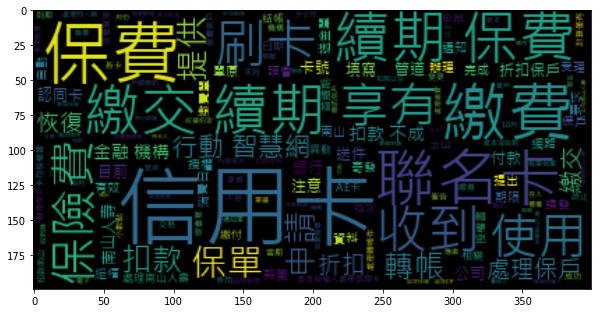

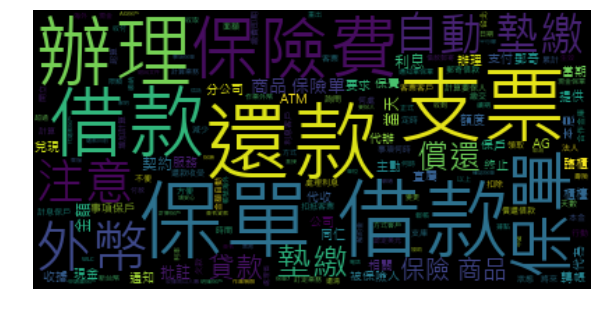

In [13]:
%matplotlib inline
#畫詞雲圖
def word_plot(question, word_sentence_list, pos_sentence_list):
    tstt=[]
    for i, sentence in enumerate(question):
        tt=[]
        for wrd, pos in zip(word_sentence_list[i], pos_sentence_list[i]):
            if pos in keep:
                tst = wrd       
                tt.append(tst)
        tstt.append(' '.join(tt))

    titles = '' 
    for wrd in tstt:
        for wd in wrd:
            titles += wd
    return titles

word_sc = word_plot(credit_card.question, word_sentence_list_cd, pos_sentence_list_cd)
word_ln = word_plot(loan.question, word_sentence_list_ln, pos_sentence_list_ln)

font_path = r'/Users/glenn/ptt風向/微软正黑体.ttf'
wordcloud = WordCloud(font_path=font_path).generate(word_sc)
plt.figure( figsize=(10,8), facecolor='k' ,frameon=False)
plt.imshow(wordcloud, interpolation='bilinear')

wordcloud = WordCloud(font_path=font_path).generate(word_ln)
plt.figure( figsize=(10,8), facecolor='k' ,frameon=False)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")

In [14]:
#印出前幾名字詞及權重
topK=10
withWeight=True
tags = jieba.analyse.extract_tags(word_sc, topK=topK, withWeight=withWeight)

if withWeight is True:
    for tag in tags:
        print("tag: %s\t\t weight: %f" % (tag[0],tag[1]))
else:
    print(",".join(tags))

tag: 保費		 weight: 0.637588
tag: 繳費		 weight: 0.432649
tag: 保戶		 weight: 0.432649
tag: 信用卡		 weight: 0.426783
tag: 續期		 weight: 0.341565
tag: 聯名		 weight: 0.318794
tag: 繳交		 weight: 0.318794
tag: 扣款		 weight: 0.306741
tag: 保單		 weight: 0.250481
tag: 人壽		 weight: 0.250481


In [15]:
#印出前幾名字詞及權重
topK=10
withWeight=True
tags = jieba.analyse.extract_tags(word_ln, topK=topK, withWeight=withWeight)

if withWeight is True:
    for tag in tags:
        print("tag: %s\t\t weight: %f" % (tag[0],tag[1]))
else:
    print(",".join(tags))

tag: 保單		 weight: 0.724531
tag: 借款		 weight: 0.506763
tag: 還款		 weight: 0.461065
tag: 保戶		 weight: 0.329332
tag: 辦理		 weight: 0.296399
tag: 墊繳		 weight: 0.296399
tag: 支票		 weight: 0.272048
tag: 保險費		 weight: 0.263466
tag: 外幣		 weight: 0.263466
tag: 保險		 weight: 0.230533


# 詞向量 Word2Vec

In [16]:
def w2v(token):
    ft=[]
    for sentence in token:
        titles = sentence.split(' ')
        ft.append(titles)
    model = Word2Vec(ft, size=60, alpha=0.025, iter=80, window=1, min_count=5, workers=1)
    return model    

def most_similar(w2v_model, words, topn=10):
    similar_df = pd.DataFrame()
    for word in words:
        try:
            similar_words = pd.DataFrame(w2v_model.wv.most_similar(word, topn=topn), columns=[word, 'cos'])
            similar_df = pd.concat([similar_df, similar_words], axis=1)
        except:
            print(word, "not found in Word2Vec model!")
    return similar_df

card_model = w2v(card_df.token)
loan_model = w2v(loan_df.token)

In [17]:
most_similar(card_model, ['保戶', '信用卡', '繳費', '轉帳'])

,保戶,cos,信用卡,cos,繳費,cos,轉帳,cos
0,保費,0.671137,南山人壽,0.826562,續期,0.716253,信用卡,0.755613
1,信用卡,0.657095,保費,0.778726,保費,0.685166,保費,0.714689
2,轉帳,0.653820,轉帳,0.755613,信用卡,0.660997,保戶,0.653820
3,續期,0.585428,行動,0.728578,轉帳,0.642056,繳費,0.642056
4,繳交,0.558015,繳交,0.723640,管道,0.632371,管道,0.639594
5,折扣,0.546561,續期,0.704237,繳交,0.626091,智慧網,0.621452
6,行動,0.546105,智慧網,0.698919,南山人壽,0.581633,續期,0.602351
7,繳費,0.545378,繳費,0.660997,扣款,0.580449,南山人壽,0.599535
8,管道,0.542816,扣款,0.660839,智慧網,0.568428,行動,0.583449
9,扣款,0.539118,保戶,0.657095,刷卡,0.555931,機構,0.566707


In [18]:
most_similar(loan_model, ['借款', '還款', '墊繳', '支票'])

,借款,cos,還款,cos,墊繳,cos,支票,cos
0,計算,0.314207,保單,0.210142,外幣,0.314243,保戶,0.253824
1,墊繳,0.257698,辦理,0.136037,事項,0.260652,注意,0.158742
2,保單,0.221183,計算,0.110609,借款,0.257698,外幣,0.110930
3,注意,0.201243,注意,0.014281,辦理,0.256512,保險,0.097059
4,貸款,0.193754,保險,0.008187,保戶,0.183950,自動,0.083623
5,辦理,0.190071,支票,-0.009458,注意,0.160486,借款,0.077198
6,事項,0.178088,借款,-0.031124,貸款,0.152293,償還,0.073088
7,保險費,0.155604,外幣,-0.048771,保險費,0.083572,計算,0.055480
8,支票,0.077198,保戶,-0.051674,自動,0.075218,墊繳,0.016796
9,保險,0.073747,償還,-0.102810,保單,0.044035,保險費,0.004235


# 問題測試

In [19]:
# 合併信用卡和貸還款
df_all = pd.concat([card_df, loan_df], axis=0)
df_all.shape

(117, 3)

In [25]:
ft=[]
for sentence in df_all['token']:
    titles = sentence.split(' ')
    ft.append(titles)
    
model = Word2Vec(ft, size=60, alpha=0.025, iter=20, window=3, min_count=1, workers=1)

def qa(custq):
    #新進問題作斷詞及詞性標注
    word_sentence_list = ws(custq,
                    recommend_dictionary = dictionary,
                    sentence_segmentation=True)
    pos = POS(path)
    pos_sentence_list = pos(word_sentence_list)
    entity_sentence_list = ner(word_sentence_list, pos_sentence_list)

    #做完斷詞後去蕪存菁（留下必要的詞性及詞庫裡有的詞）
    q=[]
    for i, sentence in enumerate(custq):
        for wrd, pos in zip(word_sentence_list[i], pos_sentence_list[i]):
            if pos in keep and wrd not in ("/", '"') and wrd in model.wv.vocab:   
                q.append(wrd)

    similarity_score=[]
    for i in range(0, len(ft)):
        try:
            similarity_score.append(model.n_similarity(q, ft[i]))
        except:
            continue

    df = pd.DataFrame(list(zip(df_all['question'], similarity_score, ft, df_all['answer'])), 
                   columns =['question', 'score', 'text', 'answer']) 
    
    if not df[df['score']>=0.6].empty:
        df_temp = df[df['score']>=0.6].sort_values('score', ascending=False)
        df_final = df_temp.iloc[:3]
    elif not df[df['score']>=0.4].empty:
        print("您是否想問下列問題？")
        df_final = df.sort_values('score', ascending=False).iloc[:3]
    else:
        df_final=['很抱歉！詞庫裡沒有相關的字詞對應...']
    return df, df_final

In [32]:
import time
start = time.time()

custq = ['法人如何辦理保單借款？']
#custq = ['借款利息計算？']
custq = ['更換新卡該如何處理？']
#custq = ['授權書有誤是否可以修改？']
#custq = ['南山聯名卡有多少折扣？']
#custq = ['更換新卡該如何辦理繳費？']
#custq = ['保單借款如何償還？']
#custq = ['我沒有收到繳費單']
custq = ['你叫什麼名字？']
card_all, card_ans = qa(custq)

end = time.time()
print(end - start)

card_ans

11.69526219367981


/Users/glenn/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:27: DeprecationWarning: Call to deprecated `n_similarity` (Method will be removed in 4.0.0, use self.wv.n_similarity() instead).


['很抱歉！詞庫裡沒有相關的字詞對應...']

### 分詞庫檢索

In [22]:
def qa(df, custq):
    ft=[]
    for sentence in df['token']:
        titles = sentence.split(' ')
        ft.append(titles)
    model = Word2Vec(ft, size=60, alpha=0.025, iter=20, window=3, min_count=1, workers=1)
    #新進問題作斷詞及詞性標注
    word_sentence_list = ws(custq,
                    recommend_dictionary = dictionary,
                    sentence_segmentation=True)
    pos = POS(path)
    pos_sentence_list = pos(word_sentence_list)
    entity_sentence_list = ner(word_sentence_list, pos_sentence_list)

    #做完斷詞後去蕪存菁（留下必要的詞性及詞庫裡有的詞）
    q=[]
    for i, sentence in enumerate(custq):
        for wrd, pos in zip(word_sentence_list[i], pos_sentence_list[i]):
            if pos in keep and wrd not in ("/", '"') and wrd in model.wv.vocab:   
                q.append(wrd)

    similarity_score=[]
    for i in range(0, len(ft)):
        try:
            similarity_score.append(model.n_similarity(q, ft[i]))
        except:
            continue

    df = pd.DataFrame(list(zip(df['question'], similarity_score, ft, df['answer'])), 
                   columns =['question', 'score', 'text', 'answer']) 
    
    if not df[df['score']>=0.6].empty:
        df_temp = df[df['score']>=0.6].sort_values('score', ascending=False)
        df_final = df_temp.iloc[:3]
    else:
        df_final = df.sort_values('score', ascending=False).iloc[:3]
    return df, df_final

In [23]:
import time
start = time.time()

custq = ['法人保單辦理借款？']
custq = ['借款利息計算？']

card_all, card_ans = qa(loan_df, custq)

end = time.time()
print(end - start)

card_ans

11.29938817024231


/Users/glenn/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:25: DeprecationWarning: Call to deprecated `n_similarity` (Method will be removed in 4.0.0, use self.wv.n_similarity() instead).


,question,score,text,answer
3,借款利息如何計算？如何償還？,0.906693,"[借款, 利息, 計算, 償還]",1.利息計算(1)依各險種之保單預定利率為基準加碼調整且設定上、下限，若保單預定利率加碼後超過上限或低於下限時，則各以上、下限利率為該保單之保單借款/自動墊繳保費利率。加碼率及保單借款/自動墊繳保費利率之上、下限則將依市場狀況機動調整。(2)保單條款另有約定單借款/自動墊繳保費利率為10﹪者，仍維持不變。2.利率規則如下：(1)依各險種之保單預定利率加碼，加碼率：O.五%。(2)保單借款/自動墊繳保費利率上限：年息六.九﹪。(3)保單借款/自動墊繳保費利率下限：年息四﹪。自105.9.01起，調整幣利率變動型商品之保單貸款利率為依各商品的『保單宣告利率+1%』，無利率上下限之限制。3.償還的方式(1)保單借款本金部份：隨時皆可償還(2)保單借款利息部份：保單週年日償還，若經催告未償還將會滾入本金計算。(3)償還的管道（現金或即期票）南山繳費服務通路契變/復效還款不定期增額郵局劃撥(帳號49765條碼劃撥單)--102.5.27生效VVV7-11便利商店多媒體機(ibon)VV全家便利商店多媒體機(FamiPort)VV7-11之中信銀行ATM(查詢及繳費客製化功能)VVV台新銀行ATM(查詢及繳費客製化功能)VVV金融機構ATM轉帳(永豐銀行807/中國信託822)VVV金融機構臨櫃匯款V信用卡/客戶服務櫃檯臨櫃刷卡(復效保費不含貸款及墊繳者)V客戶服務櫃檯臨櫃繳交現金VVV以支票繳費VVV
0,如何辦理保單借款（本人、代辦）？金額如何計算？,0.634555,"[辦理, 保單, 借款, 代辦, 金額, 計算]",1.要保人親自辦理保單借款時須檢具文件：(1)個人保件：「保單借款合約書」(每份保單一張)；要保人與被保險人須親自簽名。要保人身份證正本或護照正本。(自105/09/05起，取消駕照可為正式文件一事。)(2)要保人為公司之保件：「保單借款合約書」(每份保單一張)；蓋公司章並須有被保險人親自簽名同意公司負責人身份證(公司負責人身份證未載明為該公司負責人時，應補公司營業執照正本)公司章：與原要保書所蓋之印鑑相同；若留存於本公司之印鑑已變更者，以變更後之印鑑為準填寫「遵循洗錢防制法之客戶身分辨識表(法人適用)」(107.05.25新增)2.要保人委託他人代辦保單借款時須檢具文件：受任人須在「保單借款合約書」之「見證人／受任人簽章」欄位簽章並攜帶身份證正本或護照正本，連同要保人保單、身份證正本、保單借款合約書代辦保單借款。(自105/09/05起，取消駕照可為正式文件一事。)(若為業務同仁代由通訊處送件，請檢付要保人身份證影本，並請要保人於影本上簽名。)3.目前最高可借款額度為保單價值準備金或現金價值兩者較低之九成（千元以下捨去）。
